# Data Understanding and Data Visualization


#### Objectives


The objectives to be achieved with this notebook are as follows:

-   Explore the data to find out its characteristics or features useful for creating our Recommender System.
-   Prepare and convert the data to a more appropriate format.
-   Visualise the data in order to understand their relationships.


#### Table of contents
           
1. [Data Extraction](#de)
2. [Import Libraries](#il)
3. [Board Games Data Understanding](#bgdu)
      - [Load Data](#bgld)
      - [Data Cleaning](#bgdc)
4. [Users Data Understanding](#udu)
      - [Load Data](#uld)
      - [Data Wrangling](#udw)
      - [Data Cleaning](#udc)
5. [Data Engineering](#dv) 
6. [Data Visualization](#dv)       

<a id="de"></a>

## 1. Data Extraction

For this analysis we will use two datasets. A dataset containing board games and their main characteristics. And a dataset of users whose characteristics are related to the games that each user owns and their own evaluations of those games.

The data pertaining to the games dataset have been obtained from the Board Game Geek [BGG](https://boardgamegeek.com/). The download date of the dataset is 26/03/2021.


The data belonging to the user dataset has been acquired from WebScraping on a page associated with the BGG. After this process, different files were obtained, one for each user, the content of which corresponds to the data for that user only.



<a id="il"></a>

## 2. Import libraries

In [5]:
import os
import glob
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#import matplotlib.style as style 
import seaborn as sns
#import shutil
pd.options.display.max_columns = None

<a id="bgdu"></a>

## 3. Board Games Data Understanding

<a id="bgld"></a>

- ### Load Data

In [ ]:
path='/Users/postigo/Google Drive/BoardGamesData' #Actualizar tras crear Prepair the Env
file = os.path.join(path, "bgg_GameItem.csv") 

In [ ]:
dfbg=pd.read_csv(file, low_memory=False)
dfbg.head()

In [ ]:
print('Number rows and columns', dfbg.shape)

In [ ]:
dfbg.columns

In [ ]:
dfbg.info()

<a id="bgdc"></a>

- ### Data Cleaning

#### Quick overview of values

In [ ]:
dfbg.describe(include='all')

#### Check for duplicate values

In [ ]:
dfbg['bgg_id'].value_counts()

In [ ]:
dfbg['bgg_id'].duplicated().sum() 

In [ ]:
dfbg['name'].duplicated().sum()

In [ ]:
dfbg[dfbg['name'].duplicated()]

In [ ]:
dfbg[dfbg['name']=='Dune']

In [ ]:
dfbg[dfbg['name']=='Arma']

When checking one by one the names that appear duplicated we see that only the name is repeated, the rest of attributes are different. These games are reeditions of the original game whose author, categories or mechanics have changed with each edition, so they are considered as different games when placing the id of the game.

#### Check for null values

In [ ]:
dfbg.isnull().sum()

#### Discard columns with all null values and columns not interesting for this analysis

In [ ]:
cols= ['bgg_id', 'name', 'year','designer','min_players', 'max_players','min_time', 'max_time', 'category','cooperative']
dfbg2= pd.read_csv(file,usecols= cols, low_memory=False)
dfbg2.head()

In [ ]:
dfbg2.info()

#### Order the dataset according to the year column

In [ ]:
year = dfbg2.sort_values('year', ascending=False)
year.head(50)

In [ ]:
year['year'][year['year'].isin([2021, 2022])].count()

In [ ]:
# Review the games released in 2020, which is the last year completed

year['year'][year['year']==2020].count()

In [ ]:
# Check for negative values

year['year'][year['year']<0]

In [ ]:
year['year'][year['year']<0].count()

In [ ]:
year.tail(50)

In [ ]:
year['year'].isnull().sum()

In 1900 the board game industry began to evolve, and in 1970 began to create games that tried to create different and more complex gaming experiences, as is the case of **Dungeons and Dragons**, or the evolution of board games, such as **The Hare and the Tortoise** by *David Parlett*, which is the first board game to win a **Spiel Des Jahres** (Game of the Year) in 1979, one of the most prestigious awards worldwide to this day. The mere fact that an award for board game of the year began to exist already gives us to understand that at that time the industry could define its criteria of what represents a board game as such.  


An important and notable difference between traditional and modern board games is the inclusion of game themes, which are not necessarily based on reality, but on fantasy and fiction, being the case of multiple examples such as **Catan**, **Carcassonne**, **Dominion** or **The Resistance**.  


**Since the objective of this TFM is the creation of a modern board game recommender. We consider 1970 as the year in which modern board games began to be created and therefore, all our analysis will focus on games created after that date.**




In [ ]:
year['year'][year['year']<1970].count()

In [ ]:
year['year'][year['year']>=1970].count()

In [ ]:
year[year['year']>=1970].isnull().sum()

In [ ]:
dfbg3=dfbg2[dfbg2['year']>=1970]
dfbg3.info()

In [ ]:
# Change the data types
bg=dfbg3.copy()
bg['year']=bg.loc[:, 'year'].apply(np.int)
bg

In [ ]:
bg.info()

#### Display of games after 1970

In [ ]:
year_num=list(bg['year'])
year_count={i:year_num.count(i) for i in year_num}
print(year_count)

In [ ]:
yy= list(year_count.values())
xy= list(year_count.keys())

fig = plt.figure(figsize=(15,3), dpi=300)
ax = fig.gca()

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale = 1, rc={'axes.titlesize': 15})
values = np.array(yy) 
clrs = ['darkgreen' if (x < max(values)) else 'red' for x in values ]
bar=sns.barplot(x=xy, y=yy, ax=ax, palette=clrs, alpha = 0.85)
#sns.despine(left=True, bottom=True)

plt.setp(bar.get_xticklabels(), rotation=90) 
bar.set_title('How many new gamesboard come out each year?',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
bar.set_xlabel('Years',fontsize = 12, )
bar.set_ylabel('Count',fontsize = 12 )
plt.show();

<a id="udu"></a>

## 4. Board Games Data Understanding

<a id="uld"></a>

- ### Load Data

In [92]:
#act_dir= os.getcwd()
%cd /users/postigo/Google Drive/BoardGamesData/users

/Users/postigo/Google Drive/BoardGamesData/users


In [93]:
# Obtain the number of users in the file
!ls | wc -l

    2853


In [94]:
# Obtain the number of records in each file
!ls | xargs wc -l > countfile.txt

In [95]:
# Read .txt data
df_countfile= pd.read_csv("countfile.txt", sep=" ", header= None, usecols=[5,6], names=['files', 'namefile'], error_bad_lines=False)
df_countfile.head()

,files,namefile
0,545,0.csv
1,489,1.csv
2,NaN,47
3,552,100.csv
4,109,1000.csv


In [96]:
# Open a user file and view the information it contains
path= "/Users/postigo/Documents/20200917_Repaso/users2"

user237= pd.read_csv("237.csv")
user237

,Unnamed: 0,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
0,0,Magic: The Gathering,182,158,7.5,10.0,32365,100.0%
1,1,Codenames,68,93,7.6,10.0,67424,99.9%
2,2,Mottainai,47,937,7.0,10.0,3486,99.9%
3,3,Innovation,44,334,7.2,10.0,14811,99.9%
4,4,Hansa Teutonica,40,139,7.6,10.0,11425,99.9%
...,...,...,...,...,...,...,...,...
212,212,Age of Steam Expansion: Germany & France,0,-1,7.9,-1.0,89,0.0%
213,213,7 Wonders Duel: Pantheon,0,-1,8.0,-1.0,8984,0.0%
214,214,1859,0,-1,6.9,8.0,25,0.0%
215,215,1844/1854,0,-1,8.0,-1.0,359,0.0%


In [97]:
user237.columns

Index(['Unnamed: 0', 'Game', 'Plays', 'BGG Rank', 'BGG Rating', 'Your Rating',
       'Users Rating', 'Utilisation'],
      dtype='object')

In [98]:
user237.shape

(217, 8)

<a id="udw"></a>

- ### Data Wrangling

#### Create a dataframe with all users and all records

In [99]:
# Merging files into a single csv

path = "/users/postigo/Google Drive/BoardGamesData/users"

all_files= glob.glob(os.path.join(path, "*.csv"))

all_df=[]
for f in all_files:
    df=pd.read_csv(f, sep=',')
    df['file'] = f.split('/')[-1]
    all_df.append(df)
    
users= pd.concat(all_df, ignore_index= True, sort=False)
users

,Unnamed: 0,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,file,Rating,Last Played,Days Since Last Play,0,1,2,3,4,5,6
0,0,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260891,202,Babuschka,0.0,16582.0,5.5,-1.0,50.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260892,203,Automobile,0.0,459.0,7.3,8.0,5365.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260893,204,Auf Achse,0.0,3149.0,6.2,6.0,1634.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260894,205,Alhambra: The Vizier's Favor,0.0,-1.0,6.9,-1.0,1496.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
users.columns

Index(['Unnamed: 0', 'Game', 'Plays', 'BGG Rank', 'BGG Rating', 'Your Rating',
       'Users Rating', 'Utilisation', 'file', 'Rating', 'Last Played',
       'Days Since Last Play', '0', '1', '2', '3', '4', '5', '6'],
      dtype='object')

In [101]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260896 entries, 0 to 1260895
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1260896 non-null  int64  
 1   Game                  1260895 non-null  object 
 2   Plays                 1260875 non-null  float64
 3   BGG Rank              1260875 non-null  float64
 4   BGG Rating            1260875 non-null  float64
 5   Your Rating           1260875 non-null  float64
 6   Users Rating          1260875 non-null  float64
 7   Utilisation           1260875 non-null  object 
 8   file                  1260896 non-null  object 
 9   Rating                20 non-null       float64
 10  Last Played           0 non-null        float64
 11  Days Since Last Play  20 non-null       float64
 12  0                     1 non-null        object 
 13  1                     1 non-null        object 
 14  2                     1 non-null  

<a id="udc"></a>

- ### Data Cleaning

##### Remove columns with most null records

In [102]:
users.drop(columns=['Unnamed: 0','Rating','Last Played','Days Since Last Play',
                       '0', '1','2','3','4','5','6'], axis=1,
              inplace=True)

In [103]:
users.head()

,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,file
0,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%,545.csv
1,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%,545.csv
2,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%,545.csv
3,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%,545.csv
4,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%,545.csv


##### Set the name of the file as user id

In [104]:
file= users['file'].str.split('.', n=1, expand= True)
users.insert(0, 'u_id', file[0])
users.drop(columns =['file'], inplace= True)

In [105]:
users.head()

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
0,545,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%
1,545,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%
2,545,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%
3,545,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%
4,545,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%


In [106]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260896 entries, 0 to 1260895
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   u_id          1260896 non-null  object 
 1   Game          1260895 non-null  object 
 2   Plays         1260875 non-null  float64
 3   BGG Rank      1260875 non-null  float64
 4   BGG Rating    1260875 non-null  float64
 5   Your Rating   1260875 non-null  float64
 6   Users Rating  1260875 non-null  float64
 7   Utilisation   1260875 non-null  object 
dtypes: float64(5), object(3)
memory usage: 77.0+ MB


#### *u_id* column

In [107]:
#Change the data type

users['u_id']=users['u_id'].astype(int)

In [108]:
users['u_id'].max()

2851

In [109]:
# Check if u_id=0 exists

users[users['u_id']==0]

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
186645,0,Telestrations,26.0,258.0,7.4,7.5,12793.0,99.7%
186646,0,My City,21.0,770.0,7.9,8.0,1578.0,99.2%
186647,0,No Thanks!,16.0,449.0,7.1,8.5,20289.0,97.4%
186648,0,Pandemic Legacy: Season 1,12.0,2.0,8.6,8.5,41490.0,93.6%
186649,0,Escape: The Curse of the Temple,12.0,544.0,7.0,8.0,15459.0,93.6%
...,...,...,...,...,...,...,...,...
187184,0,2 de Mayo,0.0,1468.0,6.9,6.5,1900.0,0.0%
187185,0,1830: Railways & Robber Barons,0.0,196.0,7.9,-1.0,4680.0,0.0%
187186,0,Zooloretto,0.0,755.0,6.8,7.5,13881.0,0.0%
187187,0,Zooloretto: Christmas Tree,0.0,-1.0,6.6,-1.0,97.0,0.0%


In [110]:
users['u_id']=users['u_id']+1

In [111]:
users['u_id'].max()

2852

#### Who is the user with the highest number of board games?

In [112]:
user_num=list(users['u_id'])
user_count=users.groupby('u_id')['Game'].count()
print(user_count)

u_id
1       544
2       488
3       199
4       196
5       239
       ... 
2848    239
2849    305
2850    249
2851     41
2852    406
Name: Game, Length: 2852, dtype: int64


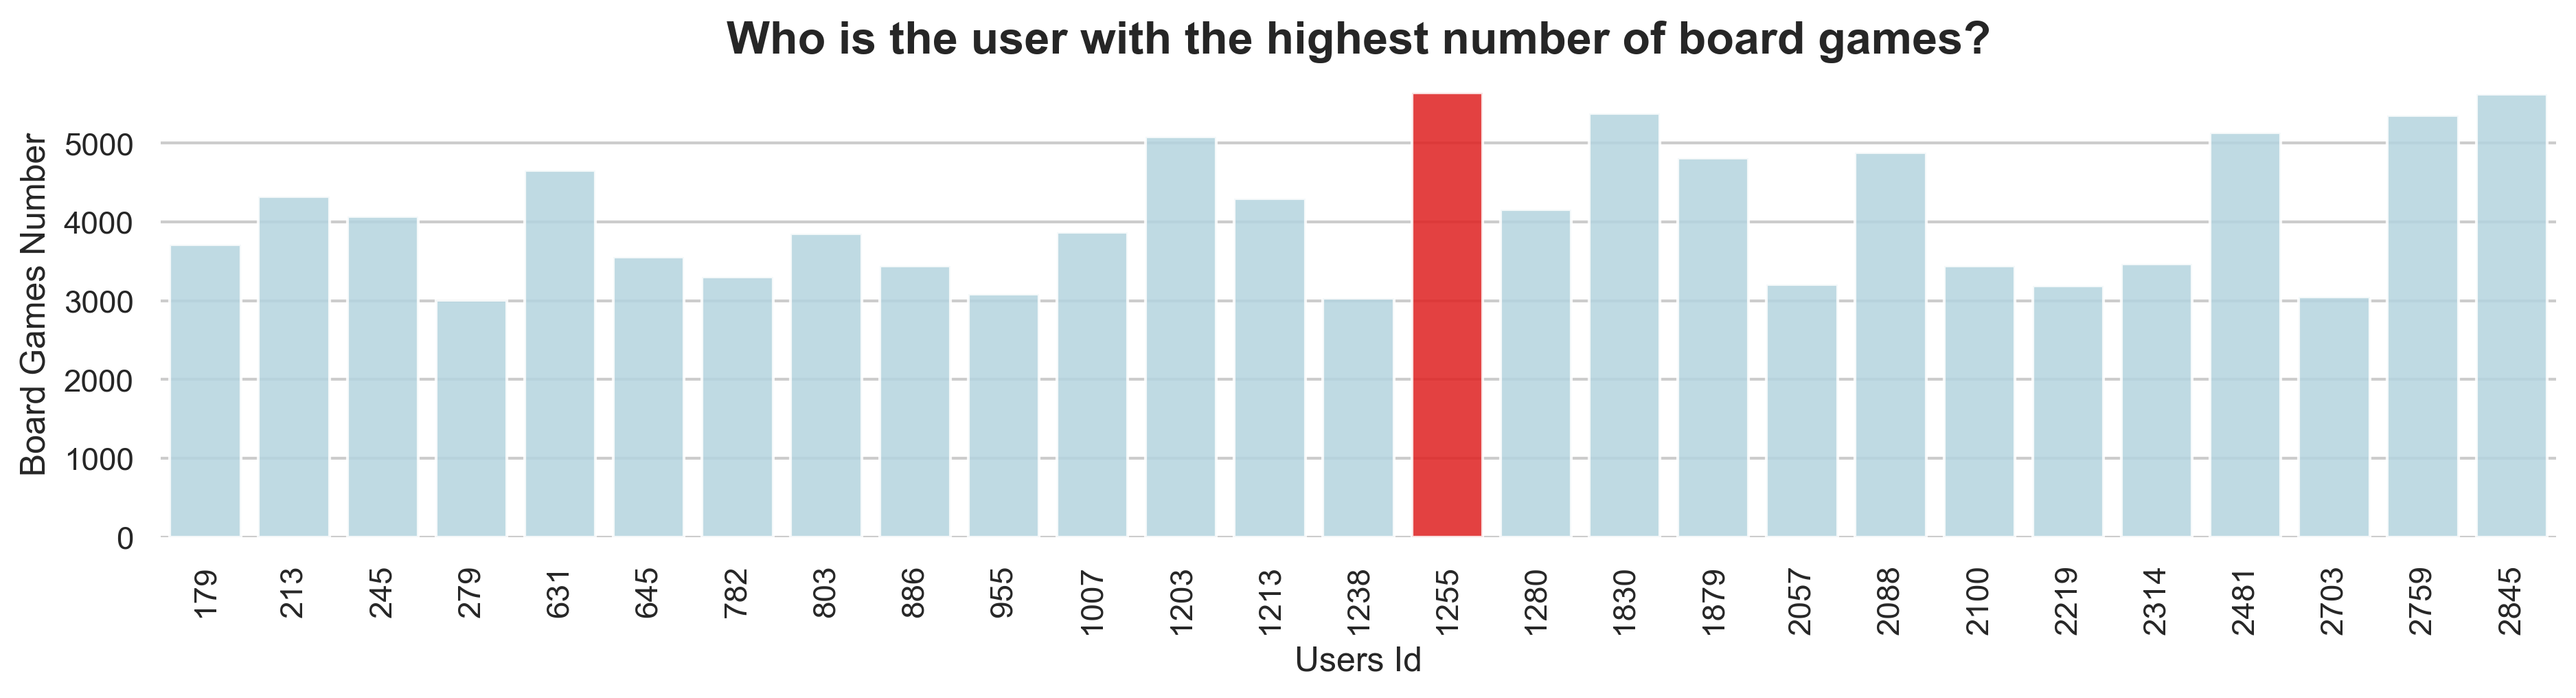

In [114]:
yy= list(user_count[user_count > 3000])
xy= list(user_count[user_count > 3000].index.values)

fig = plt.figure(figsize=(15,3), dpi=300)
ax = fig.gca()

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale = 1, rc={'axes.titlesize': 15})
values = np.array(yy) 
clrs = ['lightblue' if (x < max(values)) else 'red' for x in values ]
bar=sns.barplot(x=xy, y=yy, ax=ax, palette=clrs, alpha = 0.85)
sns.despine(left=True, bottom=True)

plt.setp(bar.get_xticklabels(), rotation=90) 
bar.set_title('Who is the user with the highest number of board games?',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
bar.set_xlabel('Users Id',fontsize = 12, )
bar.set_ylabel('Board Games Number',fontsize = 12 )
plt.show();

#### Check for null values

In [115]:
users.isnull().sum()

u_id             0
Game             1
Plays           21
BGG Rank        21
BGG Rating      21
Your Rating     21
Users Rating    21
Utilisation     21
dtype: int64

In [116]:
users[users['Plays'].isnull()]

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
653918,2774,Creepers,NaN,NaN,NaN,NaN,NaN,NaN
653919,2774,Crokinole,NaN,NaN,NaN,NaN,NaN,NaN
653920,2774,Machi Koro,NaN,NaN,NaN,NaN,NaN,NaN
653921,2774,Yomi,NaN,NaN,NaN,NaN,NaN,NaN
653922,2774,ZÈRTZ,NaN,NaN,NaN,NaN,NaN,NaN
653923,2774,Kingsburg,NaN,NaN,NaN,NaN,NaN,NaN
653924,2774,Keltis: Das Orakel,NaN,NaN,NaN,NaN,NaN,NaN
653925,2774,Mystic Vale,NaN,NaN,NaN,NaN,NaN,NaN
653926,2774,Hive,NaN,NaN,NaN,NaN,NaN,NaN
653927,2774,Tao Long: The Way of the Dragon,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Remove null values

users.dropna(axis=0, inplace=True)

In [118]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260875 entries, 0 to 1260895
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   u_id          1260875 non-null  int64  
 1   Game          1260875 non-null  object 
 2   Plays         1260875 non-null  float64
 3   BGG Rank      1260875 non-null  float64
 4   BGG Rating    1260875 non-null  float64
 5   Your Rating   1260875 non-null  float64
 6   Users Rating  1260875 non-null  float64
 7   Utilisation   1260875 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 86.6+ MB


#### Review other outliers

In [119]:
users.describe()

,u_id,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating
count,1.260875e+06,1.260875e+06,1.260875e+06,1.260875e+06,1.260875e+06,1.260875e+06
mean,1.404150e+03,2.857805e+00,2.462062e+03,7.042334e+00,2.701321e+00,5.761924e+03
std,8.142236e+02,2.254360e+01,4.513049e+03,8.895329e-01,4.191426e+00,1.233732e+04
min,1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,6.980000e+02,0.000000e+00,-1.000000e+00,6.600000e+00,-1.000000e+00,2.140000e+02
50%,1.375000e+03,0.000000e+00,4.350000e+02,7.100000e+00,-1.000000e+00,1.077000e+03
75%,2.088000e+03,2.000000e+00,2.523000e+03,7.600000e+00,7.000000e+00,4.949000e+03
max,2.852000e+03,6.741000e+03,2.028500e+04,1.000000e+01,1.000000e+01,1.018650e+05


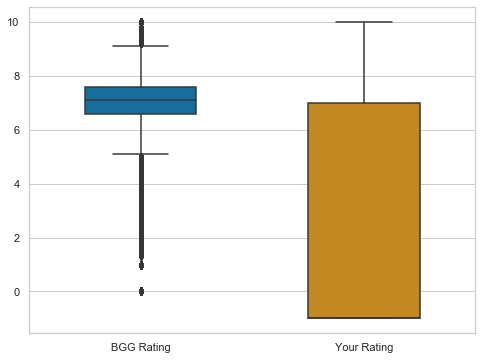

In [120]:
outl=users[['BGG Rating', 'Your Rating']]

# make boxplot with Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(data=outl, width=0.5,palette="colorblind");

In [121]:
print((users['Your Rating']>=0).sum())
print((users['Your Rating']<0).sum())

567662
693213


Within the user dataframe for the columns *'BGG Rank'*, *'BGG Rating'*, *'Your Rating'* there are values of -1. 

**What do these values mean?**

These values correspond to games that have not been rated by users.
If we analyse each of the columns mentioned above we can relate this rating to:

  - For the 'BGG Rank' column, these are games that have not been rated and are not included in the BGG Rank of games.

  - For the column 'BGG Rating' these are games that have never been rated by the users of the BGG.

  - For the 'Your Rating' column, these are games that are in the user's collection, i.e. they have been purchased by the user but have not yet been rated (either because they have not yet been played or because they have not been rated).

